In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Central Limit Theorem

The Central Limit Theorem says that the probability distribution of the average (or sum) of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.

In [2]:
united = Table.read_table('united.csv')
united.show(6)

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6


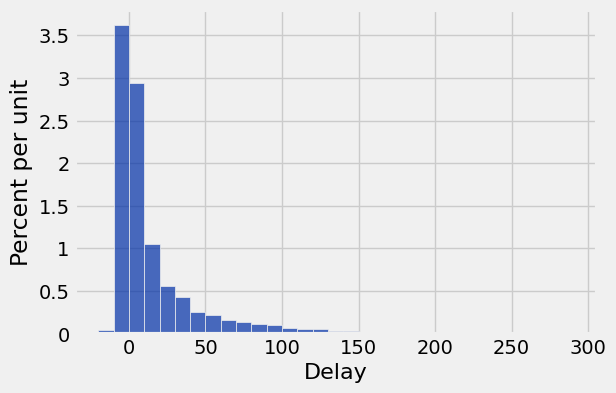

In [3]:
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [4]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
print(delay_mean)
print(delay_sd)

16.6581555154
39.4801998516


In [5]:
def one_sample_mean(sample_size):
    """ 
    Takes a sample from the population of flights 
    and computes its mean
    """
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [6]:
one_sample_mean(100)

18.59

In [7]:
sample_means_100 = make_array()
for i in np.arange(10000):
    mean = one_sample_mean(100)
    sample_means_100 = np.append(sample_means_100, mean)
sample_means_100

array([ 19.32,  22.83,  17.48, ...,  11.26,  24.17,  13.79])

Population Mean: 16.6581555154
Sample Mean 16.694826
Sample Standard Deviation 3.99016175734


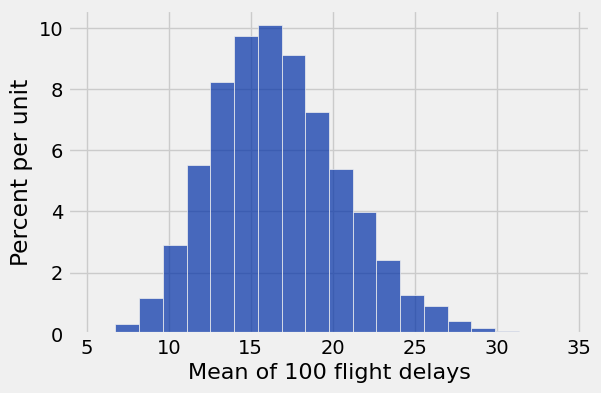

In [8]:
Table().with_column(
    'Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Mean:', delay_mean)
print('Sample Mean', np.mean(sample_means_100))
print('Sample Standard Deviation', np.std(sample_means_100))

Population Average: 16.6581555154
Sample Mean 16.6329595
Sample Standard Deviation 1.97043107057


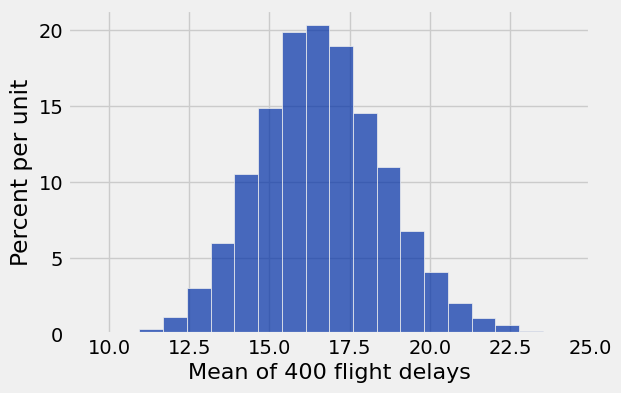

In [9]:
sample_means_400 = make_array()
for i in np.arange(10000):
    mean = one_sample_mean(400)
    sample_means_400 = np.append(sample_means_400, mean)
sample_means_400

Table().with_column(
    'Mean of 400 flight delays', sample_means_400).hist(bins=20)

print('Population Average:', delay_mean)
print('Sample Mean', np.mean(sample_means_400))
print('Sample Standard Deviation', np.std(sample_means_400))

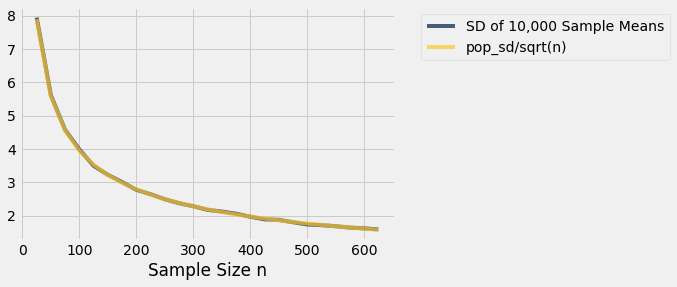

SD of sample means = Population mean / $\sqrt{\text{sample size}}$